Data Preparation

In [ ]:
# Import library yang akan digunakan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#membaca data
data=pd.read_csv("apple_quality.csv")
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [ ]:
#melihat statistik data
data.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [ ]:
#melihat informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


EDA - Preprocessing [Dilakukan Agar tidak ada nilai null atau duplikat ketika Visualisasi]

In [ ]:
jumlah_duplikat = data.duplicated().sum()
jumlah_null = data.isnull().sum()

summary = pd.DataFrame({
    "Column": jumlah_null.index,
    "Missing Values": jumlah_null.values,
    "Duplicated Rows": [jumlah_duplikat if i == 0 else 0 for i in range(len(jumlah_null))]
})

print(summary)

        Column  Missing Values  Duplicated Rows
0         A_id               1                0
1         Size               1                0
2       Weight               1                0
3    Sweetness               1                0
4  Crunchiness               1                0
5    Juiciness               1                0
6     Ripeness               1                0
7      Acidity               0                0
8      Quality               1                0


In [ ]:
data.dropna(inplace=True)
data.isnull().sum()

,0
A_id,0
Size,0
Weight,0
Sweetness,0
Crunchiness,0
Juiciness,0
Ripeness,0
Acidity,0
Quality,0


EDA

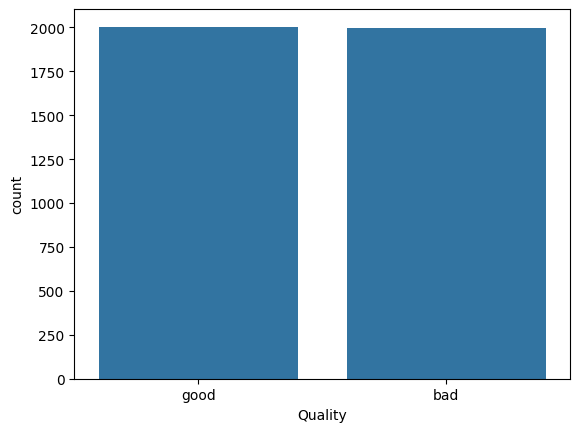

In [ ]:
sns.countplot(data=data, x="Quality")
plt.show()

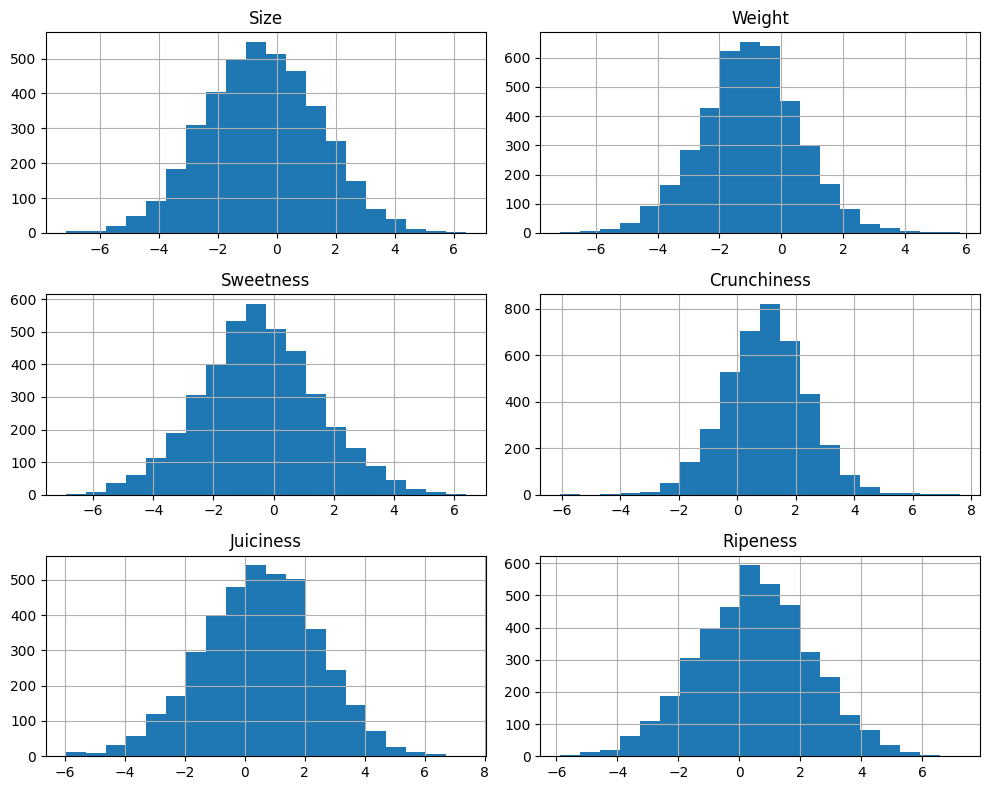

In [ ]:
data.drop(columns=['A_id']).hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

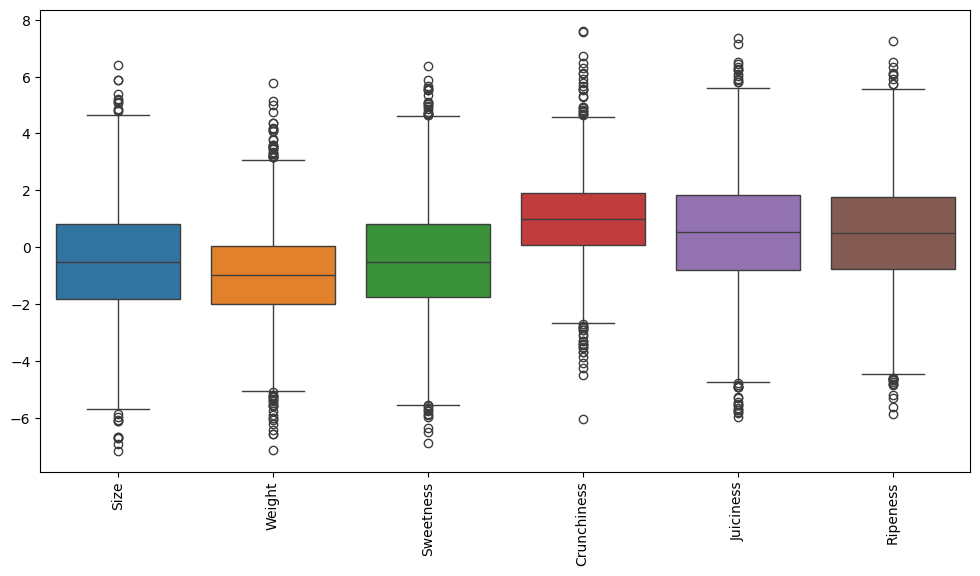

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.drop(columns=['A_id']))
plt.xticks(rotation=90)
plt.show()

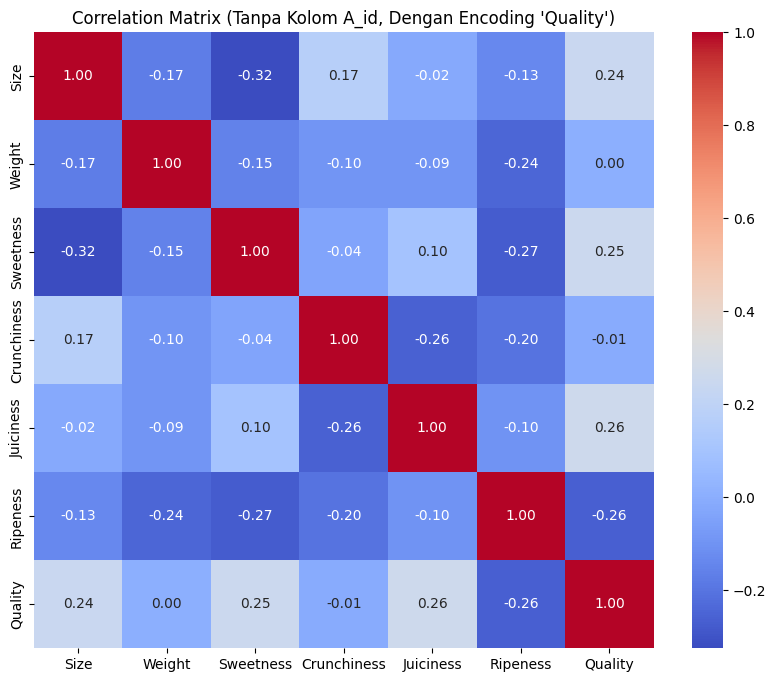

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Menambahkan kolom 'quality' yang sudah diencoding (good -> 1, bad -> 0) tanpa mengubah DataFrame asli
encoded_quality = data['Quality'].map({'good': 1, 'bad': 0})

# Menghapus kolom 'A_id' dari data sebelum menghitung korelasi
# Memasukkan kolom 'Quality' yang sudah diencoding sementara
correlation_matrix = data.drop(columns=['A_id']).select_dtypes(include='number')

# Menambahkan kolom 'Quality' yang sudah diencoding ke matriks korelasi
correlation_matrix['Quality'] = encoded_quality

# Menghitung korelasi
correlation_matrix = correlation_matrix.corr()

# Membuat heatmap korelasi
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Menambahkan judul
plt.title("Correlation Matrix (Tanpa Kolom A_id, Dengan Encoding 'Quality')")
plt.show()


In [ ]:
from scipy.stats import zscore
z_scores = data.drop(columns=['A_id', 'Quality', 'Acidity']).apply(zscore)
outliers = (z_scores.abs() > 3).sum()
print("Jumlah outliers per kolom:")
print(outliers)

Jumlah outliers per kolom:
Size           10
Weight         21
Sweetness      10
Crunchiness    29
Juiciness      16
Ripeness        8
dtype: int64


EDA - Hapus Outlier

In [ ]:
def clean_outliers_iqr(data):
    # Mengambil hanya kolom numerik
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

    # Iterasi setiap kolom numerik untuk membersihkan outlier
    for column in numeric_columns:
        Q1 = data[column].quantile(0.25)  # Quartile 1
        Q3 = data[column].quantile(0.75)  # Quartile 3
        IQR = Q3 - Q1  # Interquartile Range

        # Batas bawah dan atas
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Update data in-place dengan .loc[]
        data.loc[:, column] = data[column].where((data[column] >= lower_bound) & (data[column] <= upper_bound), other=None)

    # Drop rows with NaN values (outliers)
    data.dropna(inplace=True)

# Contoh penggunaan
import pandas as pd

# Load data (ganti dengan file Anda)
data = pd.read_csv("apple_quality.csv")

# Membersihkan outlier langsung pada DataFrame
clean_outliers_iqr(data)

# Menampilkan data setelah dibersihkan
print("Data setelah membersihkan outlier:")
print(data.describe())


Data setelah membersihkan outlier:
              A_id         Size       Weight    Sweetness  Crunchiness  \
count  3807.000000  3807.000000  3807.000000  3807.000000  3807.000000   
mean   1999.257421    -0.513117    -0.988530    -0.477744     0.982782   
std    1155.247831     1.855405     1.499503     1.872457     1.301076   
min       1.000000    -5.692093    -5.058679    -5.548641    -2.683859   
25%     998.500000    -1.801114    -1.971150    -1.724301     0.093331   
50%    1986.000000    -0.518676    -0.979888    -0.504307     0.994175   
75%    3005.500000     0.771448     0.009185     0.783380     1.872825   
max    3999.000000     4.524772     3.081538     4.606386     4.591936   

         Juiciness     Ripeness  
count  3807.000000  3807.000000  
mean      0.501219     0.529473  
std       1.854997     1.808415  
min      -4.756731    -4.471210  
25%      -0.794155    -0.712315  
50%       0.510837     0.528669  
75%       1.792787     1.773192  
max       5.598023     5.5

In [ ]:
# Ukuran data sebelum dan sesudah
print(f"Jumlah data sesudah: {data.shape[0]}")


Jumlah data sesudah: 3807


In [ ]:
# Menyimpan hasil ke file CSV baru
data.to_csv('data.csv', index=False)

print("Data bersih telah disimpan dalam file 'data.csv'")


Data bersih telah disimpan dalam file 'data.csv'


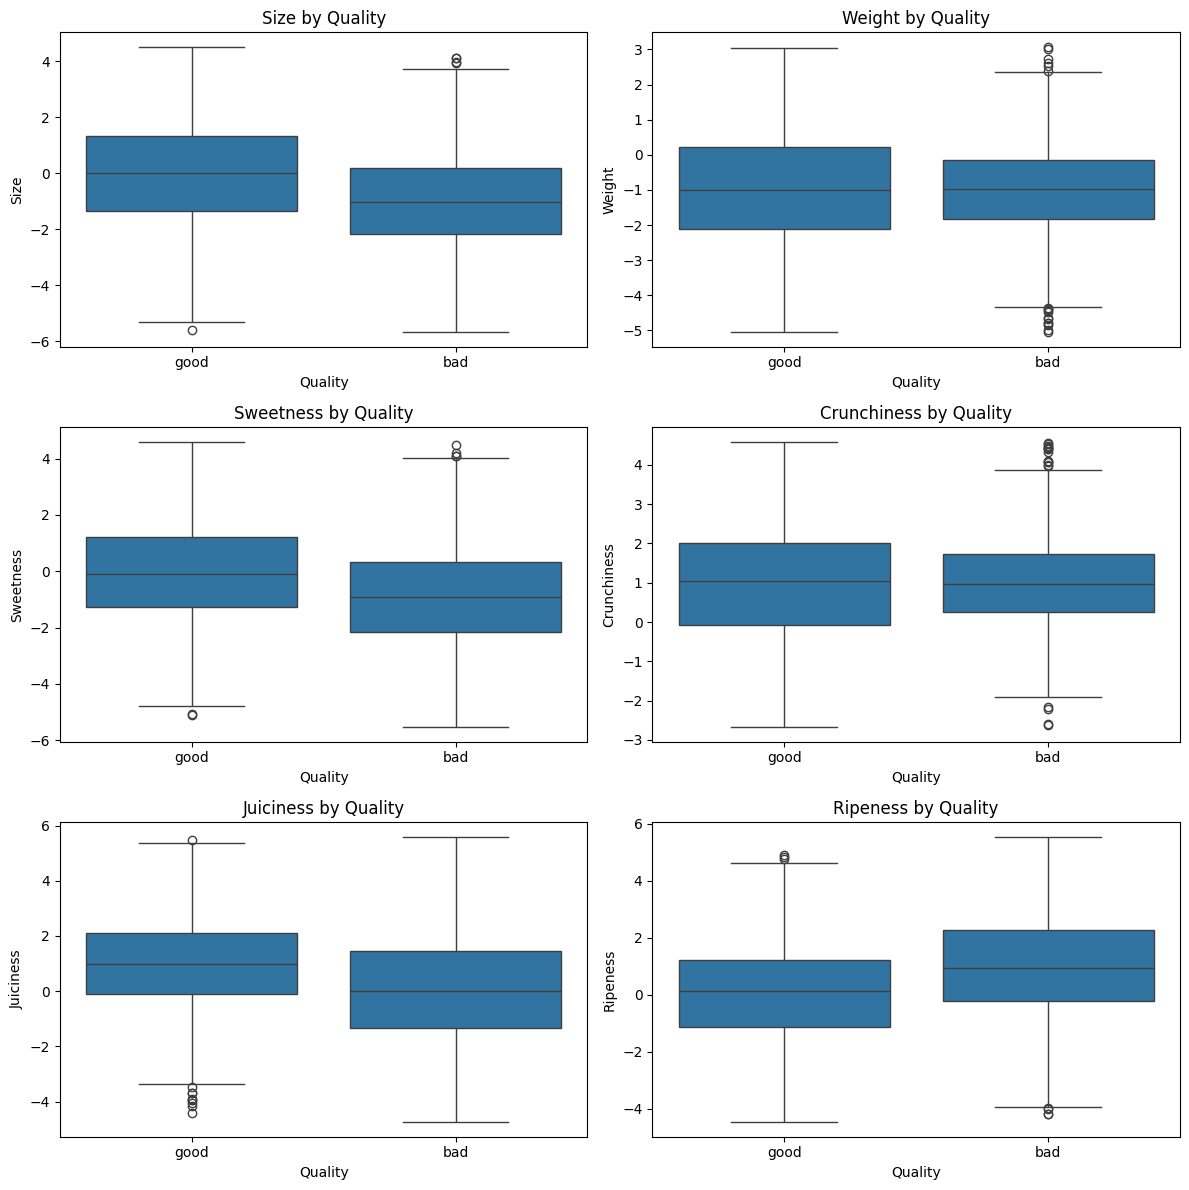

In [ ]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib
import seaborn as sns # Import seaborn for statistical data visualization

columns = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness']
n_cols = 2
n_rows = -(-len(columns) // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()
for i, column in enumerate(columns):
    sns.boxplot(x='Quality', y=column, data=data, ax=axes[i])
    axes[i].set_title(f"{column} by Quality")

for i in range(len(columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Feature Engineering

In [ ]:
data = data.drop(columns=['A_id'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3807 entries, 1 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         3807 non-null   float64
 1   Weight       3807 non-null   float64
 2   Sweetness    3807 non-null   float64
 3   Crunchiness  3807 non-null   float64
 4   Juiciness    3807 non-null   float64
 5   Ripeness     3807 non-null   float64
 6   Acidity      3807 non-null   object 
 7   Quality      3807 non-null   object 
dtypes: float64(6), object(2)
memory usage: 267.7+ KB


In [ ]:
data = data.astype({'Acidity': 'float64'})
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3807 entries, 1 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         3807 non-null   float64
 1   Weight       3807 non-null   float64
 2   Sweetness    3807 non-null   float64
 3   Crunchiness  3807 non-null   float64
 4   Juiciness    3807 non-null   float64
 5   Ripeness     3807 non-null   float64
 6   Acidity      3807 non-null   float64
 7   Quality      3807 non-null   object 
dtypes: float64(7), object(1)
memory usage: 267.7+ KB


In [ ]:
import pandas as pd

# Define the label function
def label(Quality):
    if Quality == "good":
        return 0
    elif Quality == "bad":
        return 1
    else:
        return -1  # Handle cases where Quality is neither "good" nor "bad" by assigning a specific value, like -1

# Create the 'Label' column
data['Label'] = data['Quality'].apply(label)

# Drop the 'Quality' column
data = data.drop(columns=['Quality'])

# Ensure 'Label' column is of type int64
data = data.astype({'Label': 'int64'})

# Now you can proceed with the rest of your code

In [ ]:
data.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Label
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,0
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,1
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,0
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,0
5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3807 entries, 1 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         3807 non-null   float64
 1   Weight       3807 non-null   float64
 2   Sweetness    3807 non-null   float64
 3   Crunchiness  3807 non-null   float64
 4   Juiciness    3807 non-null   float64
 5   Ripeness     3807 non-null   float64
 6   Acidity      3807 non-null   float64
 7   Label        3807 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 267.7 KB


 Memastikan Outlier Terminimalisir

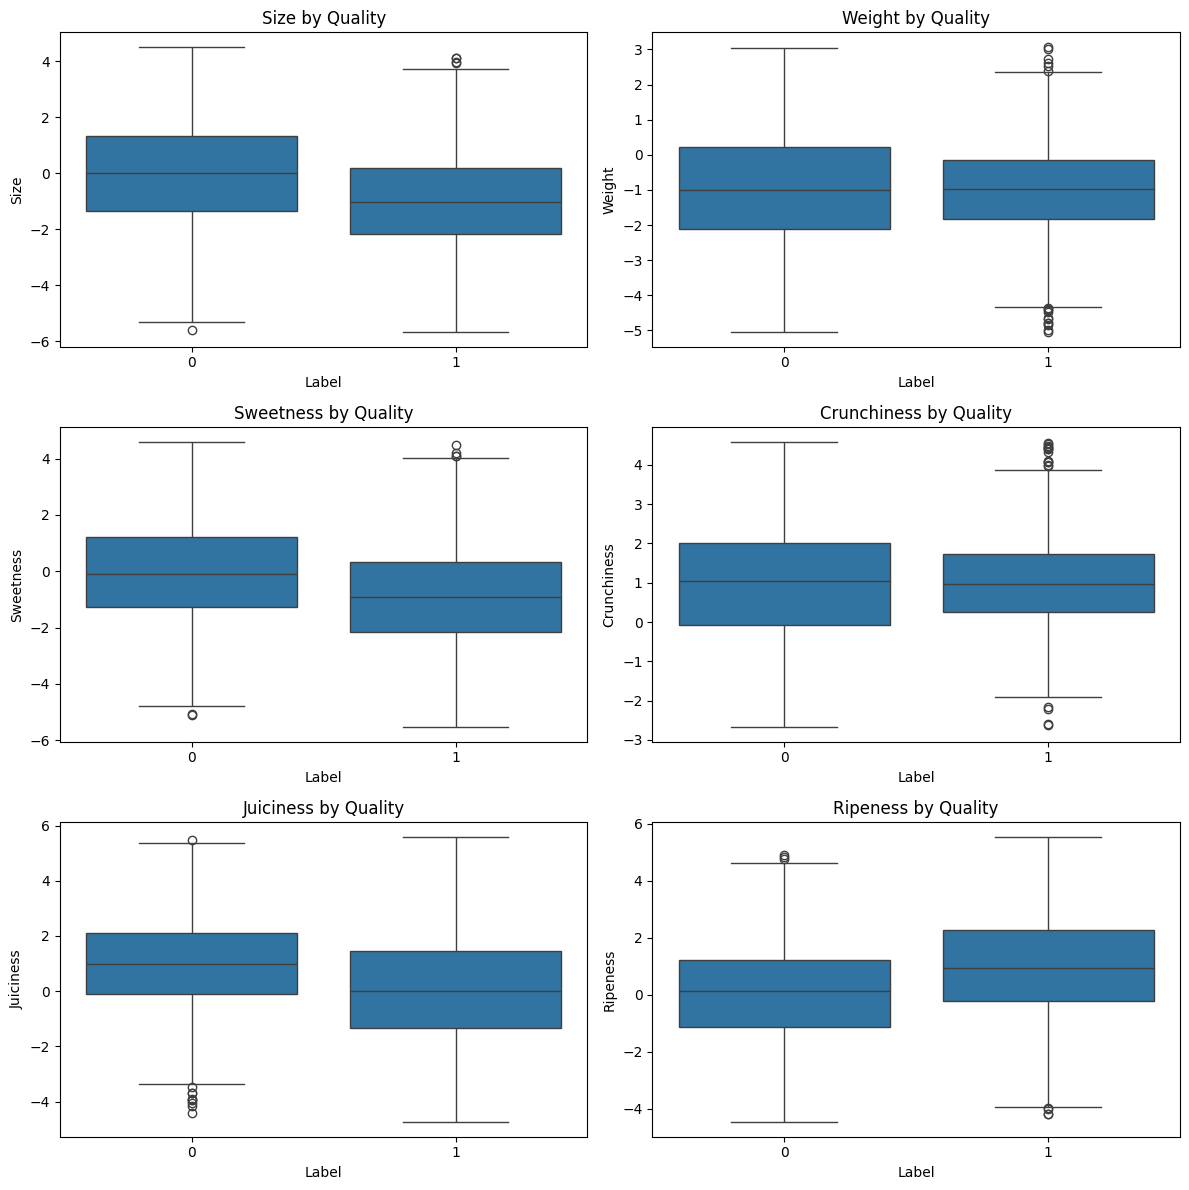

In [ ]:
columns = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness']
n_cols = 2
n_rows = -(-len(columns) // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()
for i, column in enumerate(columns):
    sns.boxplot(x='Label', y=column, data=data, ax=axes[i])
    axes[i].set_title(f"{column} by Quality")

for i in range(len(columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
data.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Label
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,0
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,1
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,0
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,0
5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,1


In [ ]:
data.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Label
count,3807.000000,3807.000000,3807.000000,3807.000000,3807.000000,3807.000000,3807.000000,3807.000000
mean,-0.513117,-0.988530,-0.477744,0.982782,0.501219,0.529473,0.065523,0.509325
std,1.855405,1.499503,1.872457,1.301076,1.854997,1.808415,2.084997,0.499979
min,-5.692093,-5.058679,-5.548641,-2.683859,-4.756731,-4.471210,-6.955460,0.000000
25%,-1.801114,-1.971150,-1.724301,0.093331,-0.794155,-0.712315,-1.374316,0.000000
50%,-0.518676,-0.979888,-0.504307,0.994175,0.510837,0.528669,0.016585,1.000000
75%,0.771448,0.009185,0.783380,1.872825,1.792787,1.773192,1.479146,1.000000
max,4.524772,3.081538,4.606386,4.591936,5.598023,5.548138,7.193374,1.000000


In [ ]:
df_model = data.copy()

In [ ]:
X = df_model.drop(['Label'], axis=1)
#X = df_model.drop(['Weight','Crunchiness','Label'], axis=1) Mencoba percobaan untuk Mengdrop dari fitur, karena korelasi terendah
y = df_model['Label']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# X adalah fitur-fitur (misalnya 'Size', 'Weight', dsb.)
# y adalah target (kelas yang ingin diprediksi)

# Normalisasi data
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


Modelling

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtr = DecisionTreeClassifier()
dtr.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dtr.predict(X_test)

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,

In [ ]:
acc_dtr = dtr.score(X_test, y_test)
acc_dtr

0.7952755905511811

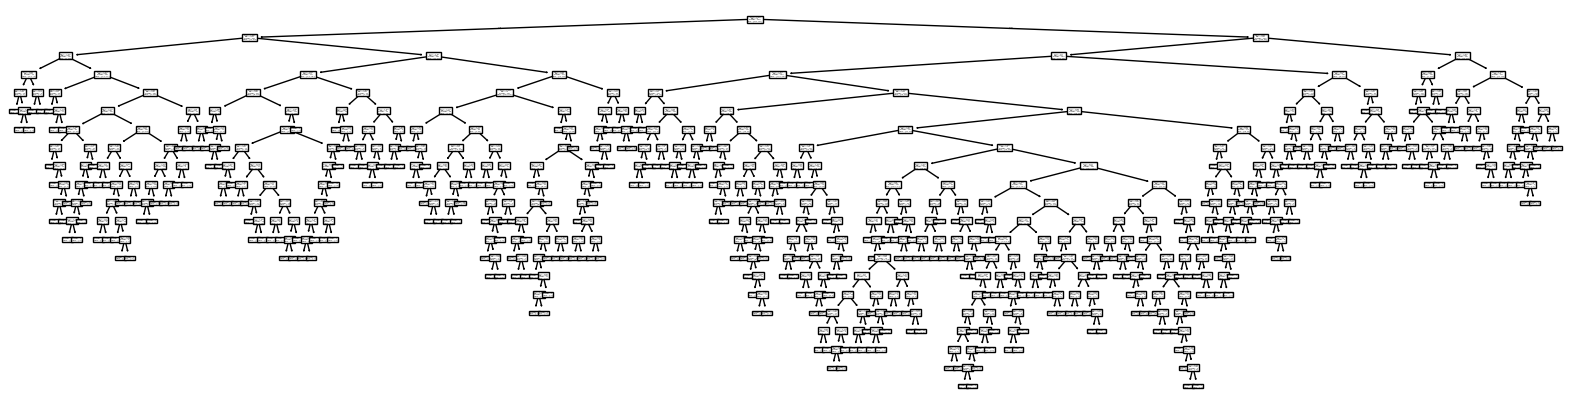

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,5))
tree.plot_tree(dtr)
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf.predict(X_test)

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,

In [ ]:
acc_rf = rf.score(X_test, y_test)
acc_rf

0.8832020997375328

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn.predict(X_test)

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,

In [ ]:
acc_knn = knn.score(X_test, y_test)
acc_knn

0.8989501312335958

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
lr.predict(X_test)

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,

In [ ]:
acc_lr = lr.score(X_test, y_test)
acc_lr

0.7454068241469817

Naive Boys

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
nb.predict(X_test)

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,

In [ ]:
acc_nb = nb.score(X_test, y_test)
acc_nb

0.7532808398950132

SVC

In [ ]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(X_train, y_train)

SVC()

In [ ]:
sv.predict(X_test)

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,

In [ ]:
acc_svm = sv.score(X_test, y_test)
acc_svm

0.8910761154855643

Evaluation - Perbandingan Antar Model

In [ ]:
list_model = ['Decision Tree', 'Random Forest', 'KNN', 'Logistic Regression', 'Naive Bayes', 'SVM']
list_acc = [acc_dtr, acc_rf, acc_knn, acc_lr, acc_nb, acc_svm]

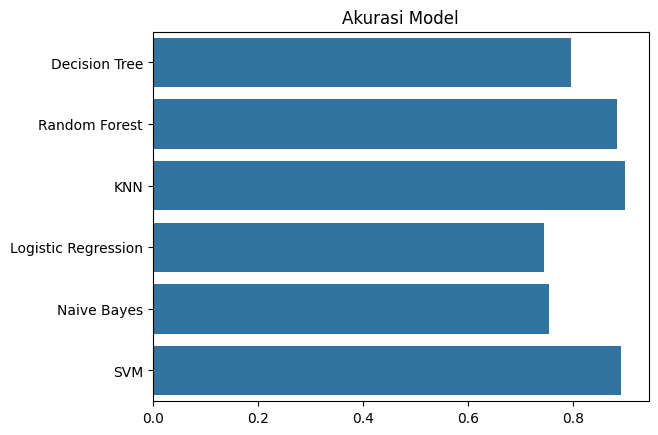

In [ ]:
sns.barplot(x=list_acc, y=list_model)
plt.title('Akurasi Model')
plt.show()

Testing

In [ ]:
# Prediksi pada data baru (misalnya input pengguna)
new_input = [[0, 5, 3, 1, 2, 1, 1]]  # Misalnya input yang baru dimasukkan

# Transformasi input jika perlu (misalnya dengan MinMaxScaler atau proses lain)
scaled_input = scaler.transform(new_input)

# Prediksi dengan model yang sudah dilatih
prediction = knn.predict(new_input)

# Tampilkan hasil prediksi
if prediction[0] == 1:
    print("Prediction: Good Quality Apple 🍎")
else:
    print("Prediction: Bad Quality Apple 🍏")

Prediction: Good Quality Apple 🍎


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Deploy

In [ ]:
import pickle


In [ ]:
filename = 'prediksi_kualitas_kematangan.pkl'
pickle.dump(knn, open(filename, 'wb'))